In [ ]:
from google.colab import files
uploaded = files.upload()


Saving HTRU_2.csv to HTRU_2 (1).csv


In [ ]:
import pandas as pd

# Yüklenen dosyanın ismini alalım
file_name = list(uploaded.keys())[0]

# Veri setini yükleyelim
data = pd.read_csv(file_name, header=None)

# Sütun isimlerini belirleyelim
column_names = [
    'Mean of the integrated profile',
    'Standard deviation of the integrated profile',
    'Excess kurtosis of the integrated profile',
    'Skewness of the integrated profile',
    'Mean of the DM-SNR curve',
    'Standard deviation of the DM-SNR curve',
    'Excess kurtosis of the DM-SNR curve',
    'Skewness of the DM-SNR curve',
    'Class'
]
data.columns = column_names

# İlk birkaç satırı görelim
print(data.head())


   Mean of the integrated profile  \
0                      140.562500   
1                      102.507812   
2                      103.015625   
3                      136.750000   
4                       88.726562   

   Standard deviation of the integrated profile  \
0                                     55.683782   
1                                     58.882430   
2                                     39.341649   
3                                     57.178449   
4                                     40.672225   

   Excess kurtosis of the integrated profile  \
0                                  -0.234571   
1                                   0.465318   
2                                   0.323328   
3                                  -0.068415   
4                                   0.600866   

   Skewness of the integrated profile  Mean of the DM-SNR curve  \
0                           -0.699648                  3.199833   
1                           -0.515088          

In [ ]:
# Temel istatistikler ve bilgiler
print("Veri Bilgisi:\n", data.info())
print("Veri İstatistikleri:\n", data.describe())

# Sınıf dağılımını inceleyelim
print("Sınıf Dağılımı:\n", data['Class'].value_counts())

# Eksik değer kontrolü
print("Eksik Değerler:\n", data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated profile     17898 non-null  float64
 3   Skewness of the integrated profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                      17898 non-null  float64
 5   Standard deviation of the DM-SNR curve        17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7   Skewness of the DM-SNR curve                  17898 non-null  float64
 8   Class                                         17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
Veri Bilgisi:
 No

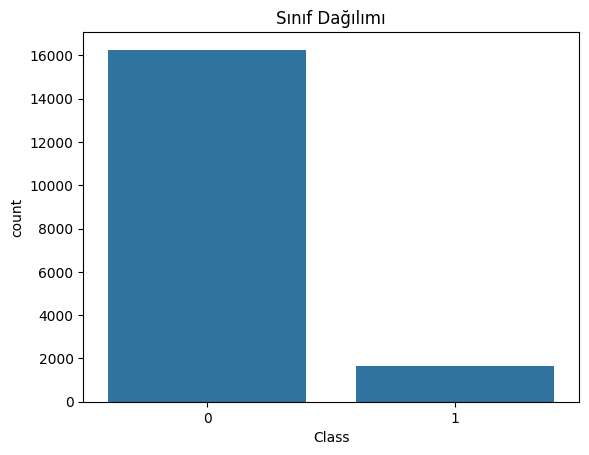

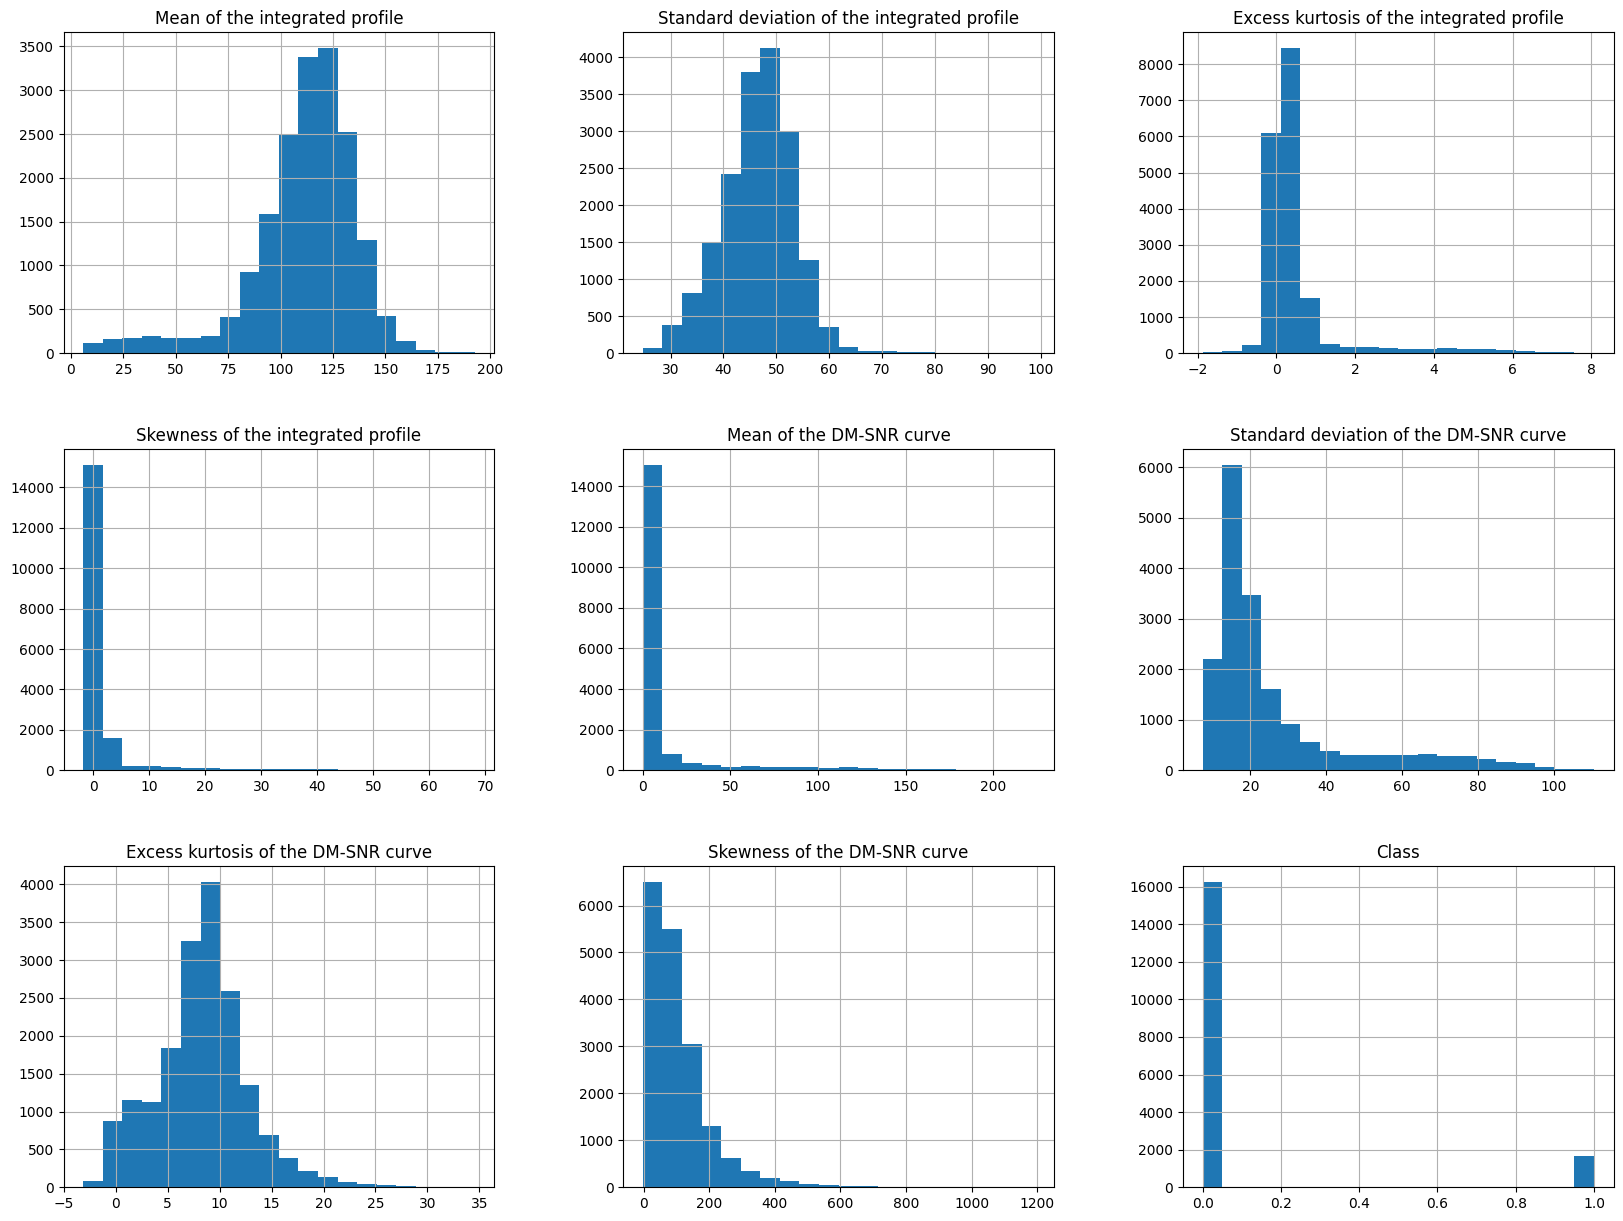

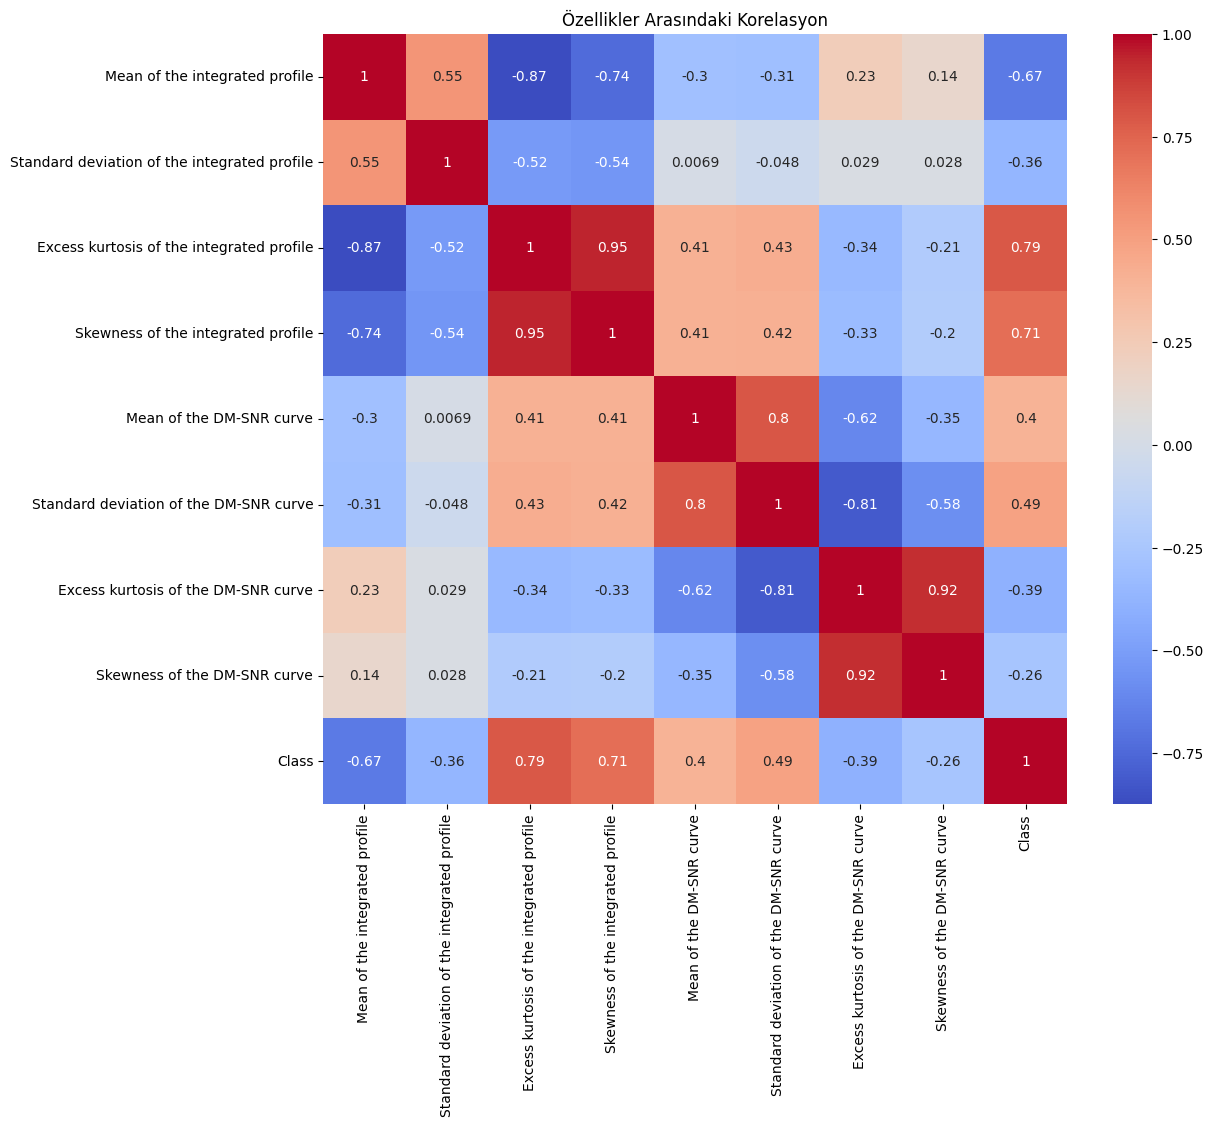

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sınıf dağılımı
sns.countplot(x='Class', data=data)
plt.title('Sınıf Dağılımı')
plt.show()

# Özelliklerin dağılımı
data.hist(bins=20, figsize=(20,15))
plt.show()

# Özelliklerin korelasyon matrisi
corr_matrix = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Özellikler Arasındaki Korelasyon')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Özellikler ve hedef değişkeni ayıralım
X = data.drop('Class', axis=1)
y = data['Class']

# Özellikleri ölçeklendirelim
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ölçeklendirilmiş veriyi DataFrame'e çevirelim
X_scaled = pd.DataFrame(X_scaled, columns=column_names[:-1])

# İlk birkaç satırı görelim
print(X_scaled.head())


   Mean of the integrated profile  \
0                        1.149317   
1                       -0.334168   
2                       -0.314372   
3                        1.000694   
4                       -0.871402   

   Standard deviation of the integrated profile  \
0                                      1.334832   
1                                      1.802265   
2                                     -1.053322   
3                                      1.553254   
4                                     -0.858879   

   Excess kurtosis of the integrated profile  \
0                                  -0.669570   
1                                  -0.011785   
2                                  -0.145233   
3                                  -0.513409   
4                                   0.115609   

   Skewness of the integrated profile  Mean of the DM-SNR curve  \
0                           -0.400459                 -0.319440   
1                           -0.370535          

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Veriyi eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# RandomForest modeli oluşturalım
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Modeli değerlendirelim
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Çapraz doğrulama ile modelin doğruluğunu değerlendirelim
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Confusion Matrix:
 [[4857   27]
 [  80  406]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4884
           1       0.94      0.84      0.88       486

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.94      5370
weighted avg       0.98      0.98      0.98      5370

Cross-validation scores: [0.97653631 0.98268156 0.98100559 0.97485331 0.9782062 ]
Mean cross-validation score: 0.9786565955035659


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Test seti tahminlerini al
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Confusion Matrix:
 [[4857   27]
 [  80  406]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4884
           1       0.94      0.84      0.88       486

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.94      5370
weighted avg       0.98      0.98      0.98      5370

Accuracy: 0.9800744878957169


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hiperparametreler için grid tanımla
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV ile en iyi hiperparametreleri bul
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# En iyi hiperparametreler
best_params = grid_search.best_params_
print("En iyi hiperparametreler:", best_params)

# En iyi modeli al
best_model = grid_search.best_estimator_

# En iyi modeli değerlendirme
y_pred_best = best_model.predict(X_test)
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("Accuracy (Best Model):", accuracy_score(y_test, y_pred_best))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
En iyi hiperparametreler: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}
Confusion Matrix (Best Model):
 [[4859   25]
 [  83  403]]
Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4884
           1       0.94      0.83      0.88       486

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.94      5370
weighted avg       0.98      0.98      0.98      5370

Accuracy (Best Model): 0.9798882681564246


In [ ]:
from sklearn.svm import SVC

# SVM modelini oluştur ve eğit
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Modeli değerlendir
y_pred_svm = svm_model.predict(X_test)
print("Confusion Matrix (SVM):\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))
print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))


Confusion Matrix (SVM):
 [[4864   20]
 [  94  392]]
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4884
           1       0.95      0.81      0.87       486

    accuracy                           0.98      5370
   macro avg       0.97      0.90      0.93      5370
weighted avg       0.98      0.98      0.98      5370

Accuracy (SVM): 0.9787709497206704


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Veriyi yükleyin
file_path = '/content/HTRU_2.csv'
data = pd.read_csv(file_path, header=None)

# Sütun isimlerini belirleyin
column_names = [
    'Mean of the integrated profile',
    'Standard deviation of the integrated profile',
    'Excess kurtosis of the integrated profile',
    'Skewness of the integrated profile',
    'Mean of the DM-SNR curve',
    'Standard deviation of the DM-SNR curve',
    'Excess kurtosis of the DM-SNR curve',
    'Skewness of the DM-SNR curve',
    'Class'
]
data.columns = column_names

# Özellikler ve hedef değişkeni ayırma
X = data.drop('Class', axis=1)
y = data['Class']

# Eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


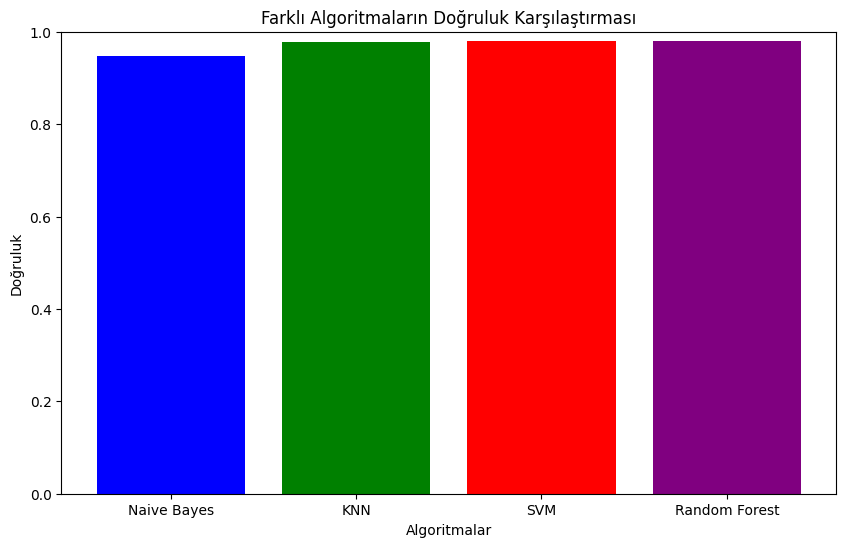

In [ ]:
# Modelleri tanımla
models = {
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Modelleri eğit ve değerlendir
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Doğrulukları görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Algoritmalar')
plt.ylabel('Doğruluk')
plt.title('Farklı Algoritmaların Doğruluk Karşılaştırması')
plt.ylim([0, 1])
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Aykırı Değerler Öncesi:  (17898, 8)
Aykırı Değerler Sonrası:  (16108, 8)


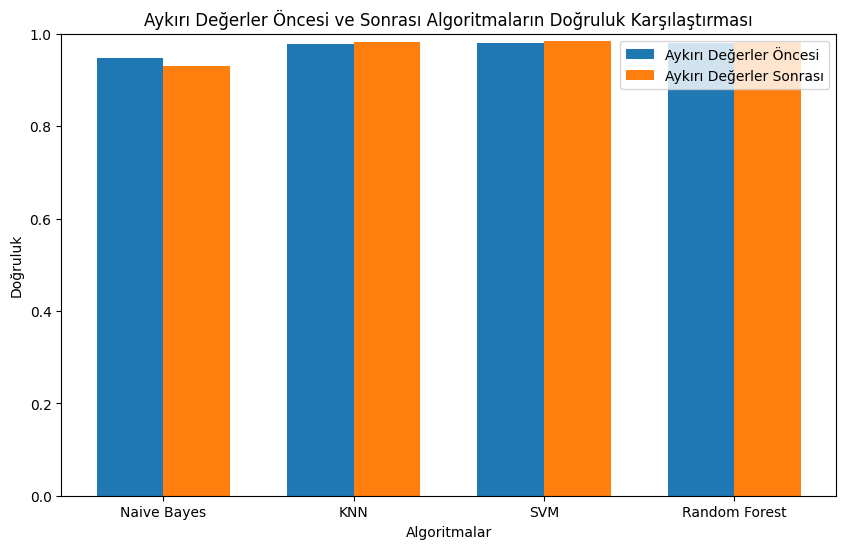

In [ ]:
from sklearn.ensemble import IsolationForest

# Aykırı değer tespiti için Isolation Forest kullanma
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X)

# Aykırı olmayan verileri seçme
mask = yhat != -1
X_no_outliers = X[mask]
y_no_outliers = y[mask]

# Aykırı değerlerin çıkarılması öncesi ve sonrası veri boyutları
print("Aykırı Değerler Öncesi: ", X.shape)
print("Aykırı Değerler Sonrası: ", X_no_outliers.shape)

# Eğitim ve test setlerine bölme
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=42)

# Özellikleri ölçeklendirme
X_train_no_outliers = scaler.fit_transform(X_train_no_outliers)
X_test_no_outliers = scaler.transform(X_test_no_outliers)

# Modelleri eğit ve değerlendir (Aykırı değerler sonrası)
accuracies_no_outliers = {}
for name, model in models.items():
    model.fit(X_train_no_outliers, y_train_no_outliers)
    y_pred_no_outliers = model.predict(X_test_no_outliers)
    accuracies_no_outliers[name] = accuracy_score(y_test_no_outliers, y_pred_no_outliers)

# Doğrulukları görselleştirme
plt.figure(figsize=(10, 6))
width = 0.35  # bar genişliği
x = np.arange(len(accuracies))

plt.bar(x - width/2, accuracies.values(), width, label='Aykırı Değerler Öncesi')
plt.bar(x + width/2, accuracies_no_outliers.values(), width, label='Aykırı Değerler Sonrası')

plt.xlabel('Algoritmalar')
plt.ylabel('Doğruluk')
plt.title('Aykırı Değerler Öncesi ve Sonrası Algoritmaların Doğruluk Karşılaştırması')
plt.xticks(x, accuracies.keys())
plt.ylim([0, 1])
plt.legend()
plt.show()


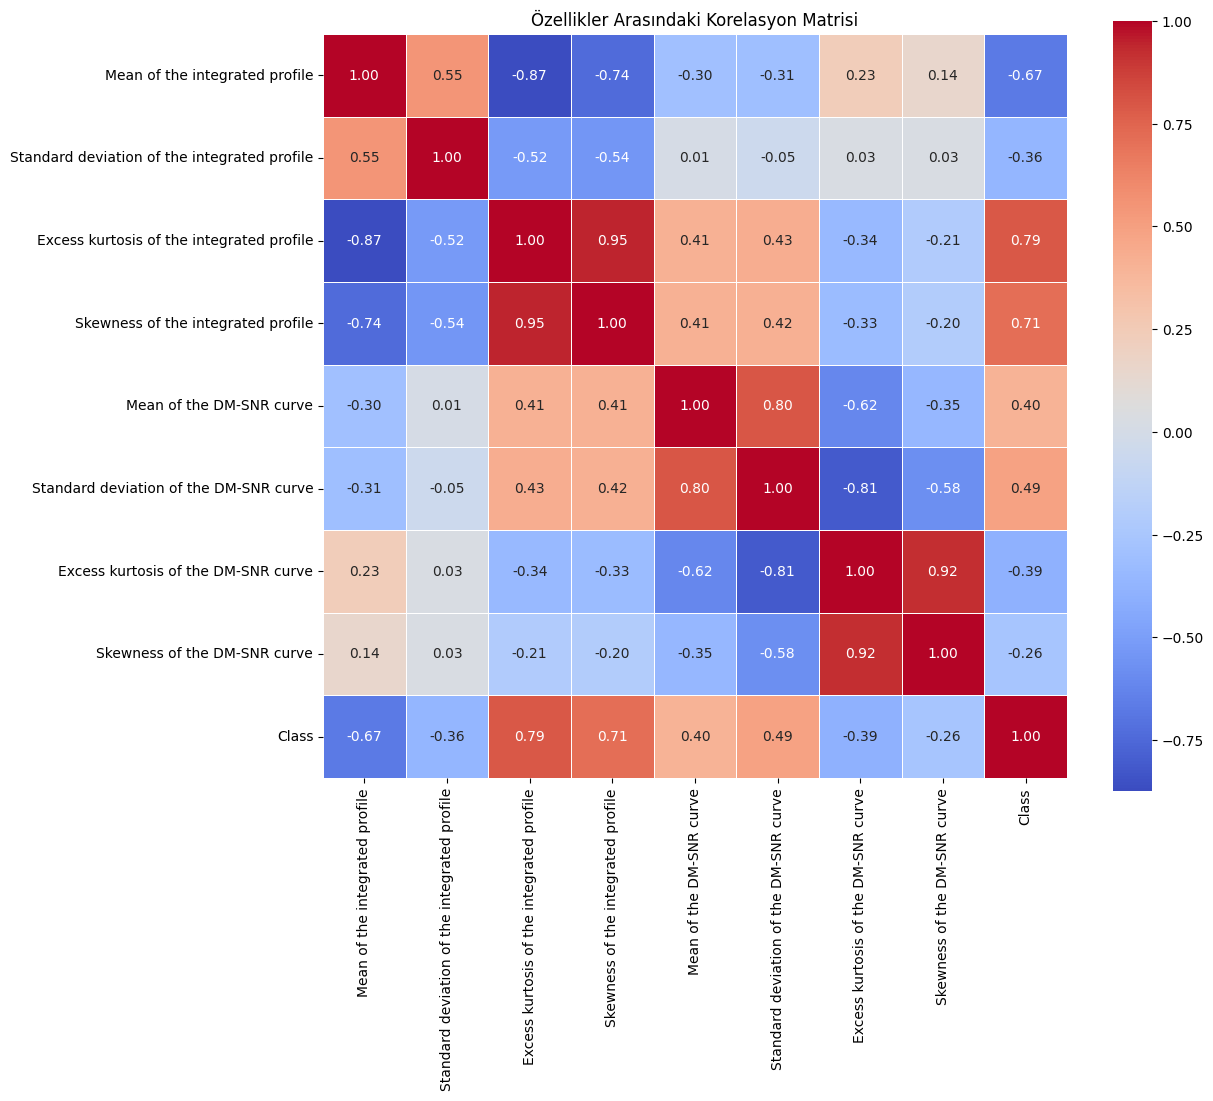

In [ ]:
# Korelasyon matrisini hesapla
corr_matrix = data.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Özellikler Arasındaki Korelasyon Matrisi')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


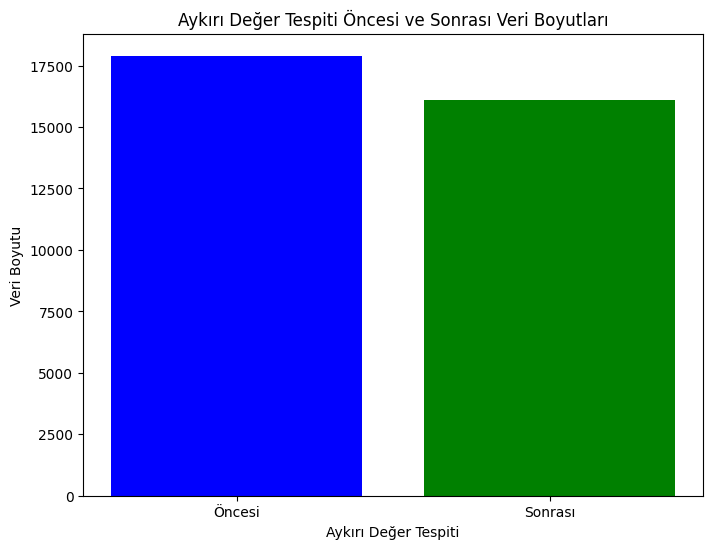

In [ ]:
from sklearn.ensemble import IsolationForest

# Aykırı değer tespiti için Isolation Forest kullanma
iso = IsolationForest(contamination=0.1, random_state=42)
yhat = iso.fit_predict(X)

# Aykırı olmayan verileri seçme
mask = yhat != -1
X_no_outliers = X[mask]
y_no_outliers = y[mask]

# Aykırı değerlerin çıkarılması öncesi ve sonrası veri boyutları
data_shape_before = X.shape[0]
data_shape_after = X_no_outliers.shape[0]

# Veri boyutlarını görselleştirme
plt.figure(figsize=(8, 6))
plt.bar(['Öncesi', 'Sonrası'], [data_shape_before, data_shape_after], color=['blue', 'green'])
plt.xlabel('Aykırı Değer Tespiti')
plt.ylabel('Veri Boyutu')
plt.title('Aykırı Değer Tespiti Öncesi ve Sonrası Veri Boyutları')
plt.show()


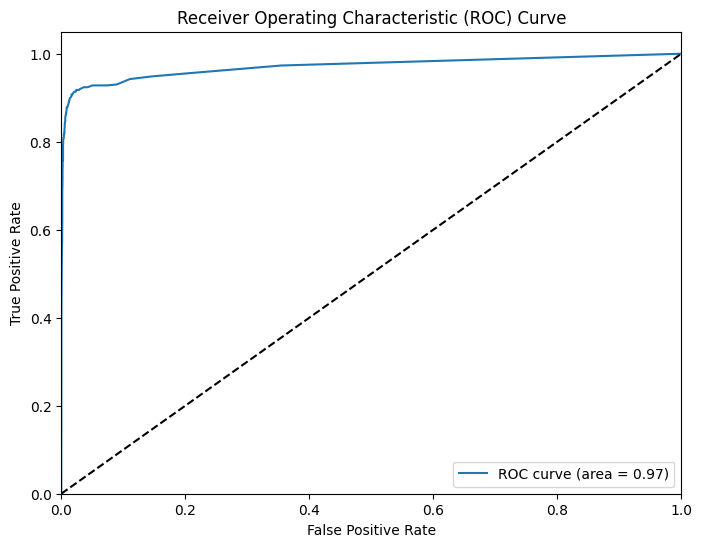

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Random Forest modelinin ROC eğrisi
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


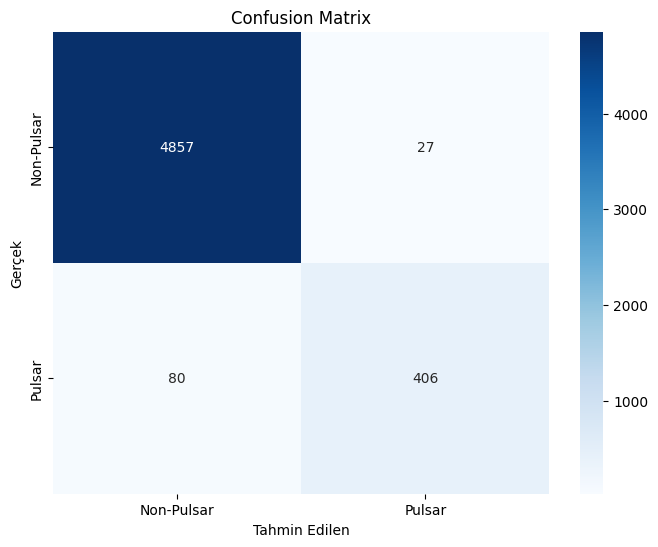

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix'i hesapla
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Pulsar', 'Pulsar'], yticklabels=['Non-Pulsar', 'Pulsar'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()
